In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("world_happiness.xlsx")
dataset_poland = dataset[dataset["Country name"] == "Poland"]

In [3]:
dataset_poland

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
353,2024,26,Poland,6.6730,6.73400,6.611000,1.666000,1.5950,0.630000,0.790000,0.021000,0.169000,1.802000
1404,2023,35,Poland,6.4420,6.51300,6.370000,1.738000,1.4170,0.639000,0.600000,0.081000,0.175000,1.791000
1405,2022,39,Poland,6.2600,6.34300,6.177000,1.767000,1.4740,0.477000,0.511000,0.120000,0.139000,1.772000
1406,2021,48,Poland,6.1230,6.20500,6.040000,1.758000,1.1740,0.712000,0.523000,0.124000,0.140000,1.693000
1407,2020,45,Poland,6.1660,6.24500,6.087000,1.309000,0.9820,0.668000,0.558000,0.080000,0.130000,2.438000
1408,2019,43,Poland,6.1863,6.25588,6.116719,1.169229,1.3104,0.868038,0.557904,0.063374,0.160541,2.056798
1409,2018,40,Poland,6.1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410,2017,42,Poland,6.1230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1411,2016,46,Poland,5.9730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412,2015,57,Poland,5.8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
years = dataset_poland["Year"]
ladder_score = dataset_poland["Ladder score"]

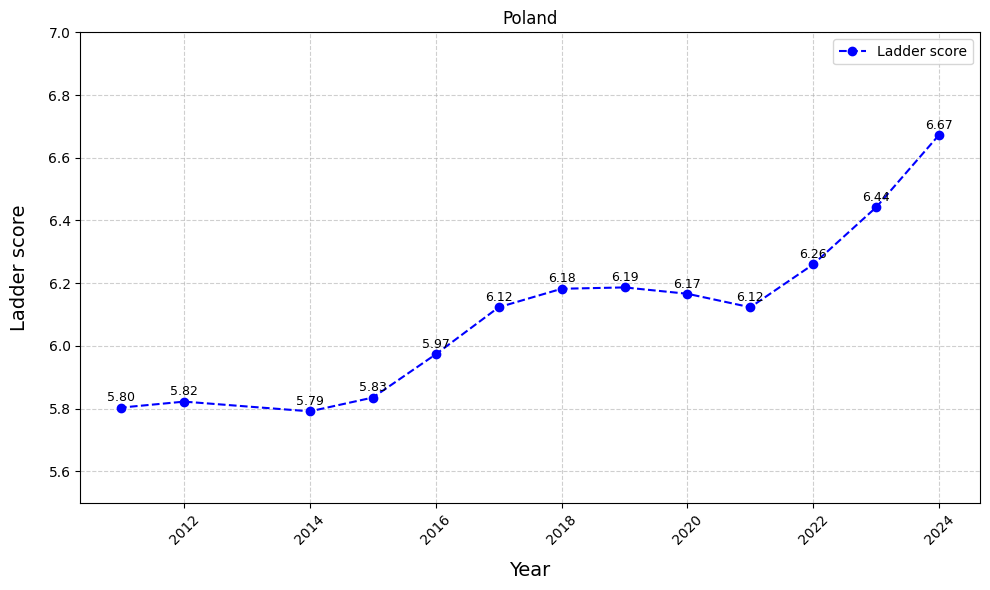

In [5]:
plt.figure(figsize=(10, 6))
for x, y in zip(years, ladder_score):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', fontsize=9)
plt.plot(years, ladder_score, label="Ladder score", color='blue', marker='o', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.title("Poland")
plt.ylim(5.5, 7)
plt.ylabel("Ladder score", fontsize=14, labelpad=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()